# Recession Predictor

The United States as of today (October, 2019) has experienced the longest expansion cycle, yet the there are constant talks in the news about an impending recession. Yes, there are signs, such as the recent yield curve inversion, the market corrections in 2018 & 2019, etc. Recessions happen every 10 years or so, are we overdue for one?

Explain other methodologies used to predict recession.
*Federal Reserve
*Rabobank
*Blah
*Blah

Explain what I'm trying to do, not only to look at recession as a binary as NBER describes it, but also to predict future GDP in the [] futre terms.

For decision variable, we will two methods:
1. Predicting impact on GDP using real GDP growth rates from prediction.
2. Returning a probabilistic model of whether a recession with occur in the defined future terms.

We are not trying to assign causality.

The following factors are considered when selecting data indicators:
* Having sufficient data, as recessions are rare occurances.
* Having forward predictive power, which means inflection changes should lead or occur simultaneously as inflection changes in GDP.
* Represent various aspects and mechanisms of the economy, such as a risk free benchmark, or inflation.
* Avoid composite models or indices. The goal is to construct our own model.

For equities, the following indicators are considered:
* [S&P 500](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC)- Weighted stock index of 500 companies listed on US exchanges with the largest market cap.
* [S&P 500 Cyclically Adjusted PE Ratio](https://www.quandl.com/data/MULTPL/SHILLER_PE_RATIO_MONTH-Shiller-PE-Ratio-by-Month) [(info)](https://www.investopedia.com/terms/c/cape-ratio.asp)- Normalizes PE ratio fluctuations over 10 year inflation-adjusted earnings. This indicator is used to gauge whether the equities market is over or under-valued.
* [**Nonfinancial Corporate Debt as Percentage of Equity**](https://fred.stlouisfed.org/series/NCBCMDPMVCE)- Contains companies not in the S&P 500. Although this indicator excludes [% of GDP](), valuations of financial and noncorporate companies 

For bonds, only government bonds are considered, as it provides "risk free" benchmark. The following indicators are considered: 
* [10 Year Constant Maturity Minus 3 Month Treasuries Yield Spread](https://fred.stlouisfed.org/series/T10Y3M)- Federal Reserve's main methodology. Financial institutions borrow at low rates short term, to lend at high rates long term. High spread means  The data only goes back to 1982, which is not enough to train this model.
* [**10 Year Constant Maturity Minus 3 Month Treasuries Secondary Market Yield Spread**](https://fred.stlouisfed.org/series/TB3MS)- Makes up for the lack of data in the primary market. Primary and secondary market spreads are very close today, due to electronic trading. However, the spread has been higher historically. This discrepancy is mostly caused by information inefficiency. Federal Reserve also [manipulates rates to some degree](https://fredblog.stlouisfed.org/2017/02/lets-do-the-twist/). Since this model relies on multiple input indicators, this flaw can be overlooked. 
* [10 Year Treasuries Constant Maturity Rate](https://fred.stlouisfed.org/series/DGS10)- Long term treasuries usually reflect investor sentiment regarding long term economic growth, with higher yield . This does not provide strong evidence of liquidity.
* 3 Months Outstanding Repo [(info)](http://law.emory.edu/ecgar/content/volume-5/issue-2/essays/repo-recession-financial-regulation.html)- Hard to find on the web. Before the Great Recession, investment banks used short term repo to inject liquidity to stay afloat. Uptick in short term repo may indicate credit crunch. FRED only has records of contracts with itself as a participant, leaving out the majority of transactions.

For inflation, the following indicators are considered:
* [**Consumer Price Index for Urban Consumers**](https://fred.stlouisfed.org/series/CPIAUCSL) [(info)](https://www.bls.gov/opub/btn/volume-3/why-does-bls-provide-both-the-cpi-w-and-cpi-u.htm)- Price inflation covering 88% of Americans, calculated from expenditures. Uses a survey to calculate the basket of goods and services. Basket is updated every 2 years. Selected due to difficulty quantifying intangible traits such as quality.
* [Chained Consumper Price Index for Urban Consumers](https://fred.stlouisfed.org/series/SUUR0000SA0) [(info)](https://www.brookings.edu/blog/up-front/2017/12/07/the-hutchins-center-explains-the-chained-cpi/)- Lacking long term data. Similar to CPI-U, but considers substitution purchases, and weights the changes every month.

For employment, the following indicators are considered:
* [Labor Participation Rate](https://fred.stlouisfed.org/series/CIVPART)- Percent of population over 16 actively seeking or engaged in employment. Too macro driven, such as women participation in the workforce, or retirement of Baby Boomers.
* [**Total Nonfarm Payroll**](https://fred.stlouisfed.org/series/PAYEMS)- Accounts for 80% of workers who contribute to GDP, excluding propritors, unpaid volunteers, or farm workers.
* [Wage Growth](https://fred.stlouisfed.org/series/CES0500000003)- Lack of long term data.

Lastly, the following indicators are not placed in any categories above, but are included because of their predictive power.
* [**Private Investment as Percent of GDP**](https://fred.stlouisfed.org/series/A006RE1Q156NBEA)- Investment represents expenditure on capital goods and residential properties. Provides an indicator for future productivity and GDP growth. Also a strong sign of economic recovery.

The following indicators were considered, but ultimately dismissed.
* [Purchaing Managers' Index](https://www.instituteforsupplymanagement.org/ismreport/mfgrob.cfm?SSO=1)- Locked behind paywall. A survey of supply chain professionals in 19 primary industries.
* [Composite Index of Leading Indicators](https://www.conference-board.org/data/bcicountry.cfm?cid=1) [(info)](https://www.investopedia.com/terms/c/cili.asp)- Locked behind paywall. A composite index of 10 indicators.
* [Consumer Confidence Index](https://www.conference-board.org/data/consumerconfidence.cfm)- Locked behind paywall. A survey of consumer purchases and sentiments.
* [VIX Volativity Index](https://fred.stlouisfed.org/series/VIXCLS)- Describes the volatility, not the direction, of stocks. Also does not describe economic strength.
* [Effective Federal Funds Rate](https://fred.stlouisfed.org/series/FEDFUNDS)- Not an organic indicator of market conditions. Different FED chairs have different doctrines. The FED was fighting inflation in the 70s, deregulation in the 80s, inflation targeting in the 90s & 2000s, then quantitative easing in the 2010s. 
* Change in working hours- Symptom, not sign, of economic strength.
* [Personal Savings Rate](https://fred.stlouisfed.org/series/PSAVERT)- Too macro driven, such as women entering workforce, or retirement of Baby Boomers.
* Incremental Capital Outputs Ratio- Hard to find on the web. Calculates how much additional capital investment is needed to create growth.

## Data Preparation

First, import the necessary packages.

In [1]:
import fredapi
import pandas as pd
import scipy as sp
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#import matplotlib as mpl
#import seaborn as sb
#import sklearn as sk

#### Import FRED Data

In [2]:
f = fredapi.Fred(api_key='8b91217446b6307d20cb5e4fcfba70eb') # remove API when done

In [3]:
# monthly data
f_tbill = f.get_series('TB3MS') # assume end of period
f_cpiu = f.get_series('CPIAUCSL') # assume end of period
f_payroll = f.get_series('PAYEMS') 
# quarterly data
f_gdp = f.get_series('GDPC1') # assume end of period
f_dtoe = f.get_series('NCBCMDPMVCE') # end of period
f_pinvest = f.get_series('GPDIC1') # assume end of period

Note instead of real GDP growth, GDP is imported. This is explained in the ______ section.

In [4]:
print(type(f_gdp))

<class 'pandas.core.series.Series'>


The function returns a series, we need to convert it to dataframe.

In [5]:
f_tbill = f_tbill.to_frame().reset_index()
f_cpiu = f_cpiu.to_frame().reset_index()
f_payroll = f_payroll.to_frame().reset_index()
f_gdp = f_gdp.to_frame().reset_index()
f_dtoe = f_dtoe.to_frame().reset_index()
f_pinvest = f_pinvest.to_frame().reset_index()

f_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
index    291 non-null datetime64[ns]
0        291 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.7 KB


Let's change the name of the columns so columns become easier to identify when joined.

In [6]:
f_tbill = f_tbill.rename(columns={'index':'date', 0:'tbill'})
f_cpiu = f_cpiu.rename(columns={'index':'date', 0:'cpiu'})
f_payroll = f_payroll.rename(columns={'index':'date', 0:'payroll'})
f_gdp = f_gdp.rename(columns={'index':'date', 0:'gdp'})
f_dtoe = f_dtoe.rename(columns={'index':'date', 0:'dtoe'})
f_pinvest = f_pinvest.rename(columns={'index':'date', 0:'pinvest'})

In [7]:
print(f_dtoe.iloc[20:30,:])

         date       dtoe
20 1950-10-01  55.603398
21 1951-01-01        NaN
22 1951-04-01        NaN
23 1951-07-01        NaN
24 1951-10-01  53.423337
25 1952-01-01  52.664943
26 1952-04-01  51.247934
27 1952-07-01  52.596629
28 1952-10-01  58.036482
29 1953-01-01  60.470498


In [8]:
print(f_tbill.head(1))
print(f_cpiu.head(1))
print(f_payroll.head(1))
print(f_dtoe.head(1))
print(f_gdp.head(1))
print(f_pinvest.head(1))

        date  tbill
0 1934-01-01   0.72
        date   cpiu
0 1947-01-01  21.48
        date  payroll
0 1939-01-01  29923.0
        date       dtoe
0 1945-10-01  43.061963
        date       gdp
0 1947-01-01  2033.061
        date  pinvest
0 1947-01-01  218.091


Some data have null values at the beginning, others have gaps in the middle. In case of f_dtoe, quarterly data starts at 1951. **We will trim our data so the first month is 1951/10/01.**

#### Preparing GDP Growth Decision Variable

#### Preparing Gross Private Investment as Share of GDP

The same rationale is applied towards Gross Private Investments.

#### Preparing Recession Decision Variable

In [9]:
start_date = pd.to_datetime('1951, 10, 1')
print(type(start_date))
f_tbill = f_tbill[f_tbill.iloc[:,0] >= start_date]
f_cpiu = f_cpiu[f_cpiu.iloc[:,0] >= start_date]
f_payroll = f_payroll[f_payroll.iloc[:,0] >= start_date]
f_pinvest = f_pinvest[f_pinvest.iloc[:,0] >= start_date]
f_dtoe = f_dtoe[f_dtoe.iloc[:,0] >= start_date]
f_dtoe.head(1)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,date,dtoe
24,1951-10-01,53.423337


For GDP, we must include previous data to derive growth rate for 1951/10/1.

In [10]:
start_date = pd.to_datetime('1951, 7, 1')
f_gdp = f_gdp[f_gdp.iloc[:,0] >= start_date]

#### Interpolating Null Data

Note that some months have null values. We will use [cublic spline interpolation](https://columbiaeconomics.com/2010/01/20/how-economists-convert-quarterly-data-into-monthly-cubic-spline-interpolation/), a technique commonly used by economists. Cubic spline has the advantage of smoothing over quadratic interpolation. We must also use Newey-West standard errors when dealing with multiple cublic splines, as the method imparts the same features, thereby increasing correlation.

We are interested in GDP growth, but GDP growth is the first derivative of GDP, and quarterly values reflect the product of the three months contained. Second, GDP growth is an annualtized rate, and does not describe quarterly growth. To avoid dealing with exponential interpolation, we will interpolate monthly GDP, derive quarterly GDP growth, then annualtized GDP growth.

In [11]:
f_gdp = f_gdp.set_index('date').resample('MS').asfreq()
f_dtoe = f_dtoe.set_index('date').resample('MS').asfreq()
f_pinvest = f_pinvest.set_index('date').resample('MS').asfreq()

In [12]:
f_gdp.head()

,gdp
date,
1951-07-01,2508.166
1951-08-01,NaN
1951-09-01,NaN
1951-10-01,2513.690
1951-11-01,NaN


Apply cubic spline.

In [13]:
f_gdp = f_gdp['gdp'].interpolate(method='spline', order=3)
f_dtoe = f_dtoe['dtoe'].interpolate(method='spline', order=3)
f_pinvest = f_pinvest['pinvest'].interpolate(method='spline', order=3)

Interpolation converts data to series. We need to convert back to DataFrame type.

In [14]:
f_gdp = f_gdp.to_frame().reset_index()
f_dtoe = f_dtoe.to_frame().reset_index()
f_pinvest = f_pinvest.to_frame().reset_index()

GDP is highly autocorrelated and non-stationary, which creates problems.

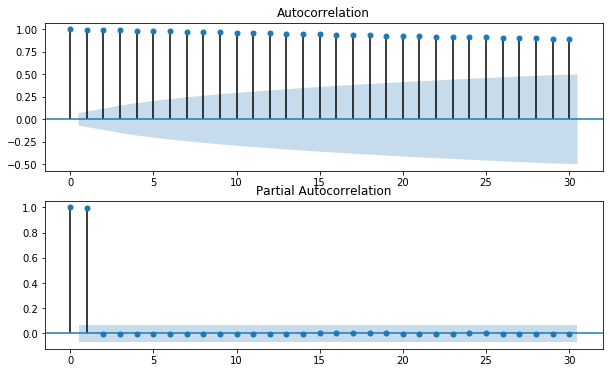

In [15]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0] = plot_acf(f_gdp.gdp, ax=ax[0])
ax[1] = plot_pacf(f_gdp.gdp, ax=ax[1])

In [16]:
f_gdp_month_diff = f_gdp
f_gdp_month_diff['gdp_month_diff'] = f_gdp_month_diff.loc[:,'gdp'].diff()
f_gdp_month_diff = f_gdp_month_diff.drop(columns='gdp')

start_date = pd.to_datetime('1951, 10, 1')
f_gdp = f_gdp[f_gdp.iloc[:,0] >= start_date]
f_gdp_month_diff = f_gdp_month_diff[f_gdp_month_diff.iloc[:,0] >= start_date]
f_gdp_month_diff.head()

,date,gdp_month_diff
3,1951-10-01,7.007234
4,1951-11-01,9.601946
5,1951-12-01,9.477538
6,1952-01-01,7.780517
7,1952-02-01,4.156407


/home/chrx/miniconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


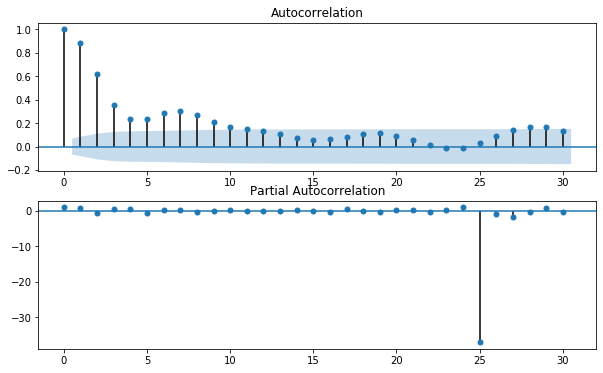

In [17]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0] = plot_acf(f_gdp_month_diff.gdp_month_diff, ax=ax[0])
ax[1] = plot_pacf(f_gdp_month_diff.gdp_month_diff, ax=ax[1])

In [18]:
f_vars = [f_tbill, f_cpiu, f_payroll, f_gdp_month_diff, f_dtoe, f_pinvest]
f_vars = reduce(lambda left,right: pd.merge(left,right,on='date'), f_vars)
f_vars = f_vars.set_index('date')

In [19]:
f_vars.isnull().sum()

tbill             0
cpiu              0
payroll           0
gdp_month_diff    0
dtoe              0
pinvest           0
dtype: int64

## Data Analysis

### Model Selection

Suitable models must be able to consider multiple variables, which means a vector autoregression (VAR) model is right for the job.

VAR assumes Granger causality relationship exists among all of the variables, in other words, all variables are dependent variables on each other. We can verify if we should reject this hypothesis.

/home/chrx/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


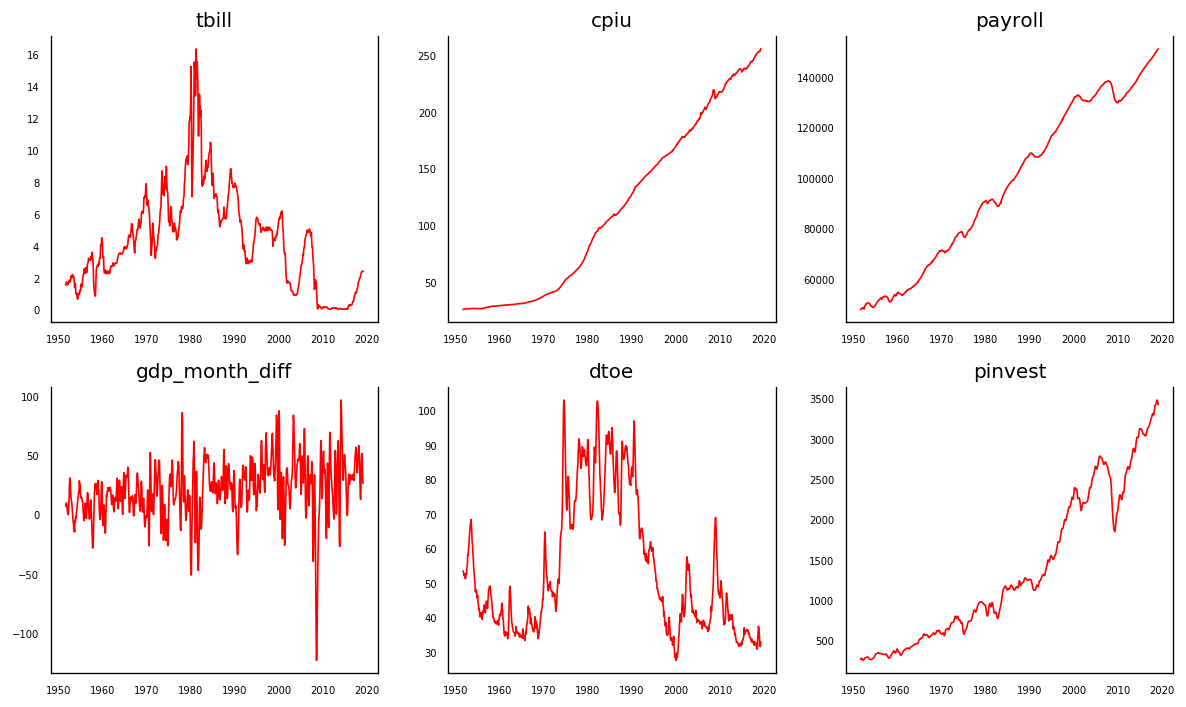

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, dpi=120, figsize=(10,6))
for col, ax in enumerate(axes.flatten()):
    ax.plot(f_vars[f_vars.columns[col]], color='red', linewidth=1)
    # Decorations
    ax.set_title(f_vars.columns[col])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

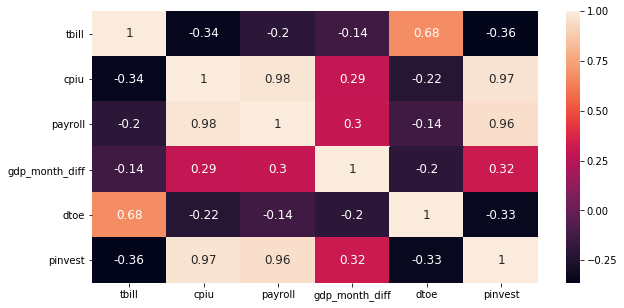

In [21]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(f_vars.corr(), xticklabels=f_vars.columns.values, yticklabels=f_vars.columns.values, annot=True, annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

We can see that CPIU, PAYROLL, and PINVEST are highly correlated. This increases the chance of overfitting and difficulty of explaining the data.

Upon closer examination of the data, PAYROLL and CPIU will be removed. PINVEST is a better long term economic indicator. insulated (consumer prices are sticky, but input prices are stickier due to long term contracts and hedging).



#### Test for Stationarity

It's important for all datasets to be stationary, meaning with the same mean and same variance overtime.

In [22]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None

    def ADF_Stationarity_Test(self, timeseries, printResults = True):

        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value

            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [23]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(f_gdp_month_diff['gdp_month_diff'], printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -5.018991
P-Value                   0.000020
# Lags Used              18.000000
# Observations Used     795.000000
Critical Value (1%)      -3.438602
Critical Value (5%)      -2.865182
Critical Value (10%)     -2.568710
dtype: float64
Is the time series stationary? True


In [24]:
sTest.ADF_Stationarity_Test(f_tbill['tbill'], printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -2.002029
P-Value                   0.285684
# Lags Used              21.000000
# Observations Used     795.000000
Critical Value (1%)      -3.438602
Critical Value (5%)      -2.865182
Critical Value (10%)     -2.568710
dtype: float64
Is the time series stationary? False


## Findings

## Limitations

This predictor does not pinpoint the cause of a recession, but makes a general comment about the state of the economy. The underlying assumption is that these inputs are efficient enough to reflect long term market conditions, but inefficient enough to price in the short term fluctuations in GDP.

When trying to quantify debt as percentage of equity, it turned out that noncoporate entities 

## Closing Thoughts

Special thanks to Mortada Mehyar for creating fredapi. This saves some time from having to deal with JSON format.

## Part 2

#### Data Preparation

Let's set up recession decision variable. Difficulty joining series, so had to convert to list, append, then reconvert to series.

In [25]:
# Create a DataFrame for recession
start_date = pd.to_datetime('1951, 10, 1')
end_date = pd.to_datetime('today')
recessions = pd.date_range(start_date, end_date, freq='MS')
recessions = recessions.to_frame().reset_index()

# Mark recession months as 1, non-recession months as 0
recessions.iloc[:,1] = 0
recessions.loc[recessions.iloc[:,0].isin(recession_months), 0] = 1
recessions.rename(columns={'index':'date', 0:'recession'}, inplace=True)

# possible to create lambda variables?

r_1953 = pd.Series(pd.date_range(pd.to_datetime('1953, 3, 1'), pd.to_datetime('1954, 5, 1'))).tolist()
r_1957 = pd.Series(pd.date_range(pd.to_datetime('1957, 8, 1'), pd.to_datetime('1958, 4, 1'))).tolist()
r_1960 = pd.Series(pd.date_range(pd.to_datetime('1960, 4, 1'), pd.to_datetime('1961, 2, 1'))).tolist()
r_1962 = pd.Series(pd.date_range(pd.to_datetime('1969, 12, 1'), pd.to_datetime('1970, 11, 1'))).tolist()
r_1973 = pd.Series(pd.date_range(pd.to_datetime('1973, 11, 1'), pd.to_datetime('1975, 3, 1'))).tolist()
r_1980 = pd.Series(pd.date_range(pd.to_datetime('1980, 1, 1'), pd.to_datetime('1980, 7, 1'))).tolist()
r_1981 = pd.Series(pd.date_range(pd.to_datetime('1981, 7, 1'), pd.to_datetime('1982, 11, 1'))).tolist()
r_1990 = pd.Series(pd.date_range(pd.to_datetime('1990, 7, 1'), pd.to_datetime('1991, 3, 1'))).tolist()
r_2001 = pd.Series(pd.date_range(pd.to_datetime('2001, 3, 1'), pd.to_datetime('2001, 11, 1'))).tolist()
r_2007 = pd.Series(pd.date_range(pd.to_datetime('2007, 12, 1'), pd.to_datetime('2009, 6, 1'))).tolist()

print('Original series length:', len(r_1953))

recession_months = pd.Series(r_1953 + r_1957 + r_1960 + r_1962 + r_1973 + r_1980 + r_1981 + r_1990 + r_2001 + r_2007)

print('Verify series was appended:', len(recession_months))

recessions.iloc[15:20]

NameError: name 'recession_months' is not defined